In [1]:
!pip install paddlepaddle

In [2]:
#!python3 -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"
!pip install protobuf==3.20.0
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [3]:
# import requests

# url = "https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl"
# response = requests.get(url)

# with open("C:\\Users\\ajayr\\ML\\layoutparser-0.0.0-py3-none-any.whl", "wb") as file:
#     file.write(response.content)

In [4]:
!wget https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
!pip install -U layoutparser-0.0.0-py3-none-any.whl

'wget' is not recognized as an internal or external command,
operable program or batch file.


Processing c:\users\ajayr\ml\layoutparser-0.0.0-py3-none-any.whl
layoutparser is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [1]:
import cv2
import layoutparser as lp
image_dir="FoodLabels"
image_string=image_dir+"\\"+"Image_CornFlakes.png"
image = cv2.imread(image_string)

image = image[..., ::-1]

# load model
model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
                                threshold=0.5,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)#math kernel library
# detect
layout = model.detect(image)

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
print(layout)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=7.2729339599609375, y_1=6.64068603515625, x_2=516.5413818359375, y_2=655.0), text=None, id=None, type=Table, parent=None, next=None, score=0.9469931721687317)], page_data={})


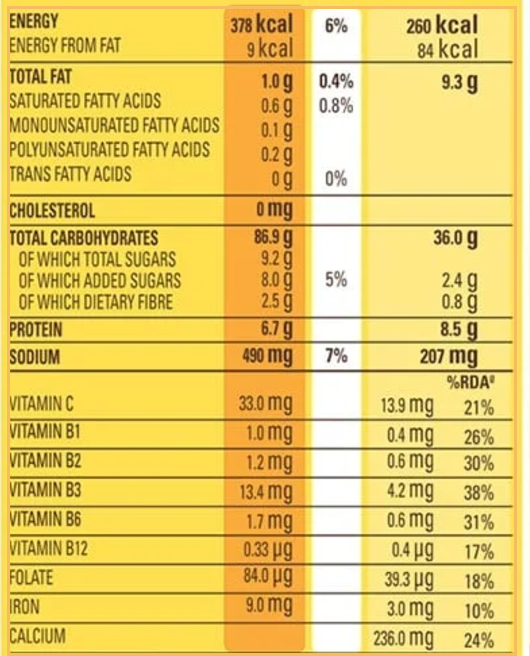

In [8]:
lp.draw_box(image, layout, box_width=3)

In [9]:
x_1=0
y_1=0
x_2=0
y_2=0

for l in layout:
  #print(l)
  if l.type == 'Figure' or l.type=='Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

    break

7.272934


In [10]:
print(x_1,y_1,x_2,y_2)

7 6 516 655


In [11]:
cv2.imwrite('ext3.jpg', image[y_1:y_2,x_1:x_2])

True

In [12]:
from paddleocr import PaddleOCR, draw_ocr

In [13]:
ocr = PaddleOCR(lang='en')
image_path = image_string
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
output = ocr.ocr(image_path)[0]

[2024/11/15 00:22:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\ajayr/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\ajayr/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [ ]:
print(output)

[[[[6.0, 10.0], [60.0, 7.0], [61.0, 30.0], [7.0, 33.0]], ('ENERGY', 0.9972031712532043)], [[[227.0, 11.0], [295.0, 8.0], [295.0, 35.0], [228.0, 37.0]], ('378 kcal', 0.9627612829208374)], [[[322.0, 12.0], [352.0, 12.0], [352.0, 39.0], [322.0, 39.0]], ('6%', 0.9207022190093994)], [[[403.0, 12.0], [481.0, 9.0], [482.0, 36.0], [404.0, 38.0]], ('260kcal', 0.9817826151847839)], [[[8.0, 36.0], [123.0, 36.0], [123.0, 56.0], [8.0, 56.0]], ('ENERGY FROM FAT', 0.9277359247207642)], [[[244.0, 37.0], [294.0, 37.0], [294.0, 60.0], [244.0, 60.0]], ('9kcal', 0.9432714581489563)], [[[415.0, 38.0], [479.0, 38.0], [479.0, 60.0], [415.0, 60.0]], ('84kcal', 0.9710026383399963)], [[[7.0, 66.0], [74.0, 66.0], [74.0, 87.0], [7.0, 87.0]], ('TOTALFAT', 0.9947983026504517)], [[[258.0, 70.0], [295.0, 70.0], [295.0, 94.0], [258.0, 94.0]], ('1.0g', 0.9945178031921387)], [[[315.0, 68.0], [358.0, 68.0], [358.0, 95.0], [315.0, 95.0]], ('0.4%', 0.9905510544776917)], [[[439.0, 68.0], [482.0, 72.0], [479.0, 99.0], [436.0

In [15]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [16]:
print(texts)

['ENERGY', '378 kcal', '6%', '260kcal', 'ENERGY FROM FAT', '9kcal', '84kcal', 'TOTALFAT', '1.0g', '0.4%', '9.3g', 'SATURATED FATTY ACIDS', '0.6g', '0.8%', 'MONOUNSATURATED FATTY ACIDS', '0.1g', 'POLYUNSATURATED FATTY ACIDS', '0.2g', 'TRANS FATTY ACIDS', 'og', '0%', 'CHOLESTEROL', 'omg', 'TOTAL CARBOHYDRATES', '86.9g', '36.0 g', 'OFWHICH TOTAL SUGARS', '9.2g', 'OF WHICH ADDED SUGARS', '8.0g', '5%', '2.4g', 'OFWHICH DIETARY FIBRE', '2.5g', '0.8g', 'PROTEIN', '6.7g', '8.5 g', 'SODIUM', '490 mg', '7%', '207 mg', '%RDA', 'VITAMINC', '33.0 mg', '13.9 mg', '21%', 'VITAMIN B1', '1.0 mg', '0.4 mg', '26%', 'VITAMIN B2', '1.2 mg', '0.6 mg', '30%', 'VITAMIN B3', '13.4 mg', '4.2 mg', '38%', 'VITAMIN B6', '1.7 mg', '0.6 mg', '31%', 'VITAMINB12', '0.33 g', '0.4 g', '17%', 'FOLATE', '84.0 g', '39.3 g', '18%', 'IRON', '9.0mg', '3.0 mg', '10%', 'CALCIUM', '236.0 mg', '24%']


In [17]:
image_boxes = image_cv.copy()

In [18]:
for box,text in zip(boxes,texts):
  # Assuming box[0] and box[2] are lists of coordinates [x, y]
  # Accessing the x and y coordinates directly
  cv2.rectangle(image_boxes,(int(box[0][0]), int(box[0][1])), (int(box[2][0]), int(box[2][1])),(0,0,255),1)
  ##cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [19]:
cv2.imwrite('detections.jpg', image_boxes)

True

RECONSTRUCTION


In [20]:
im = image_cv.copy()

In [21]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)


In [22]:
cv2.imwrite('horiz_vert.jpg',im)

True

Non-Max Suppression

In [23]:
%pip install tensorflow

  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl (431 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddlepaddle 2.6.2 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 5.28.3 which is incompatible.


In [24]:
import tensorflow as tf
import numpy as np

In [25]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [26]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[ 0  6  7 13 14 16 19 21 24 26 29 34 35 38 42 46 50 54 58 62 66 70 72 77]


In [27]:
im_nms = image_cv.copy()

In [28]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)


In [29]:
cv2.imwrite('im_nms.jpg',im_nms)

True

In [30]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [31]:
print(vert_out)

tf.Tensor([70 67 13 72 69], shape=(5,), dtype=int32)


In [32]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[13 67 69 70 72]


In [33]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)


In [34]:
cv2.imwrite('im_nms.jpg',im_nms)

True

Intersection and IOU


In [35]:
out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(24, 5)
[['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', '']]


In [36]:
unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[316, 0, 356, 656]
[7, 0, 56, 656]
[382, 0, 436, 656]
[462, 0, 497, 656]
[244, 0, 294, 656]


In [37]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[1 4 0 2 3]


In [38]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [39]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0

  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))

  return inter / float(box_1_area + box_2_area - inter)

In [40]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [41]:
out_array=np.array(out_array)

In [42]:
out_array

array([['ENERGY', '378 kcal', '6%', '260kcal', '260kcal'],
       ['ENERGY FROM FAT', '9kcal', '', '84kcal', '84kcal'],
       ['TOTALFAT', '1.0g', '0.4%', '', '9.3g'],
       ['SATURATED FATTY ACIDS', '0.6g', '0.8%', '', ''],
       ['MONOUNSATURATED FATTY ACIDS', '0.1g', '', '', ''],
       ['POLYUNSATURATED FATTY ACIDS', '0.2g', '', '', ''],
       ['TRANS FATTY ACIDS', 'og', '0%', '', ''],
       ['CHOLESTEROL', 'omg', '', '', ''],
       ['TOTAL CARBOHYDRATES', '9.2g', '', '', '36.0 g'],
       ['OFWHICH TOTAL SUGARS', '9.2g', '', '', ''],
       ['OF WHICH ADDED SUGARS', '8.0g', '5%', '', '2.4g'],
       ['OFWHICH DIETARY FIBRE', '2.5g', '', '', '0.8g'],
       ['PROTEIN', '6.7g', '', '', '8.5 g'],
       ['SODIUM', '490 mg', '7%', '207 mg', '207 mg'],
       ['', '33.0 mg', '', '', '%RDA'],
       ['VITAMINC', '33.0 mg', '', '13.9 mg', '21%'],
       ['VITAMIN B1', '1.0 mg', '', '0.4 mg', '26%'],
       ['VITAMIN B2', '1.2 mg', '', '0.6 mg', '30%'],
       ['VITAMIN B3', '13.4 m

In [43]:
import pandas as pd

In [44]:
pd.DataFrame(out_array).to_csv('final.csv')